In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

В файле Singers.xlsx находится список песен в исполнении различных певцов, а также продолжительность звучания каждой песни. Вычислите общее количество песен в исполнении Эминема и среднюю продолжительность звучания его песен. При добавлении новых данных все формулы должны обновляться автоматически.

In [7]:
singers = pd.read_excel('~/Study/excel/Ch25/Practice Files/Singers.xlsx',
                        skiprows=3, usecols=range(5,7), names=['singer', 'play'])

In [14]:
singers.head()

,singer,play
0,Eminem,2
1,Eminem,5
2,Cher,4
3,Eminem,4
4,Moore,4


In [13]:
singers.groupby('singer').agg(['count', 'mean']).loc['Eminem']

play  count    5.0
      mean     3.8
Name: Eminem, dtype: float64

В файле Tableexample.xlsx включите в лист ранг для каждого продавца согласно общей выручке и количеству проданных единиц товара. При добавлении новых данных ранги должны обновляться автоматически. Вероятно, стоит воспользоваться функцией РАНГ. Ее синтаксис в данном случае: РАНГ(число;массив;0). Эта функция возвращает ранг числа в массиве. У самого большого числа ранг равен 1.

In [21]:
table = pd.read_excel('~/Study/excel/Ch25/Practice Files/Tableexample.xlsx',
                        skiprows=4, usecols=range(4,8)).dropna()

In [36]:
table.assign?

In [38]:
table.assign(Rank=lambda x: x[['Revenue', 'Units']].apply(tuple, axis=1)
                                                   .rank(method='dense', ascending=False).astype(int))

,Name,Units,Revenue,Unit price,Rank
0,John,814.0,39886.0,49.0,1
1,Adam,594.0,26136.0,44.0,4
2,Dixie,528.0,13200.0,25.0,6
3,Tad,806.0,20956.0,26.0,5
4,Erica,826.0,27258.0,33.0,3
5,Gabrielle,779.0,28044.0,36.0,2
6,Amanda,400.0,5000.0,12.5,7


На основе данных в файле Stock.xlsx создайте гистограммы для ежемесячных доходов от акций GE и Intel.

In [48]:
stocks = pd.read_excel('~/Study/excel/Ch41/Practice Files/Stock.xlsx',
                        sheet_name='stockprices', skiprows=50, usecols=range(6))

In [49]:
stocks

,Date,Microsoft,GE,Intel,GM,CSCO
0,1990-03-30,0.121519,0.040486,0.037267,0.022284,0.010753
1,1990-04-30,0.047404,-0.003891,-0.053892,-0.035422,0.010638
2,1990-05-31,0.258621,0.083516,0.221519,0.115819,0.042105
3,1990-06-29,0.041096,0.005445,-0.025907,-0.020566,0.070707
4,1990-07-31,-0.125000,0.034296,-0.053191,-0.020997,-0.037736
...,...,...,...,...,...,...
125,2000-08-31,0.000000,0.140948,0.121948,0.276619,0.048711
126,2000-09-29,-0.136079,-0.014711,-0.444908,-0.099567,-0.194900
127,2000-10-31,0.141969,-0.049837,0.082707,-0.044231,-0.024887
128,2000-11-30,-0.166969,-0.095781,-0.153722,-0.195171,-0.111369


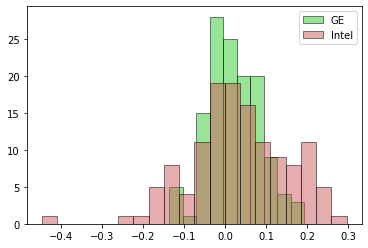

In [58]:
plt.hist(stocks["GE"], color='limegreen', alpha=0.5, 
         edgecolor="black", bins=10) 
plt.hist(stocks["Intel"], color='indianred', alpha=0.5, 
         edgecolor="black", bins=20)
plt.legend(["GE", 'Intel']);

В файле Deming.xlsx содержатся измерения диаметра (в дюймах) для 500 стержней, произведенных компанией Rodco, согласно отчету руководителя производства. Допустимый размер диаметра стержня составляет не менее 1дюйма. Раньше диаметрам стержней, производимых компанией Rodco, соответствовала симметричная гистограмма.
- Постройте гистограмму для этих измерений.
- Прокомментируйте любые необычные аспекты этой гистограммы.
Можно ли догадаться, что вызвало необычный вид гистограммы? (Подсказка: один из 14 принципов управления качеством Эдварда Деминга гласит: "Искорените страх".)

In [62]:
deming = pd.read_excel('~/Study/excel/Ch41/Practice Files/Deming.xlsx',
                       usecols=[1], names=['diameter'])

In [64]:
deming.head()

,diameter
0,1.005872
1,1.004461
2,1.011128
3,1.012668
4,1.018356


Правило Стёрджеса — эмпирическое правило определения оптимального количества интервалов, на которые разбивается наблюдаемый диапазон изменения случайной величины при построении гистограммы плотности её распределения. 

$${\displaystyle n=1+\lfloor \log _{2}N\rfloor }$$

In [94]:
n = 1 + int(3.321 * np.log10(len(deming))) # Формула Стерджеса через десятичный логарифм

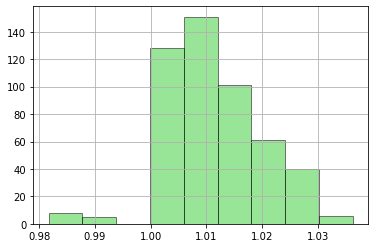

In [95]:
deming.diameter.hist(bins=n, color='limegreen', alpha=0.5, edgecolor='black');

В файле Unemployment.xlsx file находятся данные об уровне безработицы в США. Создайте на их основе гистограмму. Гистограмма уровня безработицы симметричная или асимметричная?

In [98]:
unemployment = pd.read_excel('~/Study/excel/Ch41/Practice Files/Unemployment.xlsx',
                             skiprows=3, usecols=range(2,6))

In [100]:
unemployment.head()

,Year,Month,Rate
0,1948,1,3.4
1,1948,2,3.8
2,1948,3,4.0
3,1948,4,3.9
4,1948,5,3.5


In [107]:
get_nbins = lambda x: 1 + int(3.321 * np.log10(len(x)))
n = get_nbins(unemployment)

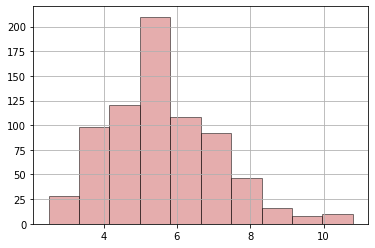

In [102]:
unemployment.Rate.hist(bins=n, color='indianred', alpha=0.5, edgecolor='black');

In [121]:
stats.skew(unemployment.Rate) # сильная правая асимметрия

0.5854259517217653

В файле Teams.xlsx содержатся данные о засчитанных пробежках в высшей баскетбольной лиге за сезон. Создайте на их основе гистограмму. Гистограмма, представляющая засчитанные пробежки, симметричная или асимметричная?

In [103]:
teams = pd.read_excel('~/Study/excel/Ch41/Practice Files/teams.xlsx',
                             skiprows=3, usecols=range(2,5))

In [105]:
teams.head()

,Year,Runs
0,2000,864
1,2000,794
2,2000,792
3,2000,978
4,2000,950


Цвета для графиков https://www.colorhexa.com/add8e6

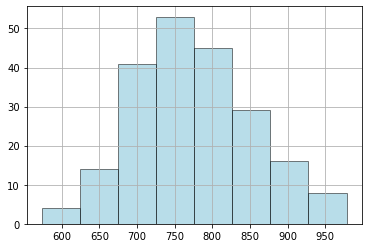

In [111]:
n = get_nbins(teams)
teams.Runs.hist(bins=n, color='#72bcd4', alpha=0.5, edgecolor='black');

In [117]:
import scipy.stats as stats

In [119]:
stats.skew(teams.Runs) # асимметрия со смещением вправо

0.17261131893063947

В файле NFLpoints.xlsx содержатся данные об очках, заработанных командами Национальной футбольной лиги за сезон. Создайте на их основе гистограмму. Гистограмма, представляющая заработанные очки, симметричная или асимметричная?

In [112]:
NFLpoints = pd.read_excel('~/Study/excel/Ch41/Practice Files/NFLpoints.xlsx',
                             skiprows=4, usecols=range(2,5))

In [115]:
NFLpoints.head()

,Rk,Tm,Pts
0,2003,Kansas City Chiefs,484
1,2003,Indianapolis Colts,447
2,2003,St. Louis Rams,447
3,2003,Green Bay Packers,442
4,2003,Tennessee Titans,435


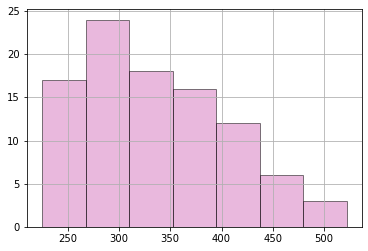

In [116]:
n = get_nbins(NFLpoints)
NFLpoints.Pts.hist(bins=n, color='#d472bc', alpha=0.5, edgecolor='black');

In [120]:
stats.skew(NFLpoints.Pts) # асимметрия со смещением вправо

0.4280836273050147